### **Pymaceuticals, Inc. – Senior Data Analyst Report on Squamous Cell Carcinoma (SCC) Study**

### **1. Introduction and Study Objective**

Pymaceuticals, Inc. recently conducted a clinical study to evaluate the effectiveness of its drug of interest, **Capomulin**, in treating **squamous cell carcinoma (SCC)** in mice. The study involved **249 mice**, each diagnosed with SCC tumors, and was carried out over a 45-day period. The goal of the study was to assess the performance of Capomulin against other drug regimens and to provide insights into tumor growth under different treatments.

### **2. Key Parameter for analysis**

The study utilized a variety of **drug regimens** to treat the mice, including Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, and Zoniferol. Key parameters collected during the study include:
- **Mouse ID**: Unique identifier for each mouse.
- **Drug Regimen**: The different drugs used for treatment.
- **Tumor Volume (mm³)**: Tumor size at different time points.
- **Timepoint**: The days for which tumor volume was analyzed.
- **Weight (g)**: Mouse weight at each timepoint.
- **Metastatic Sites**: Number of metastases.

The study results were used to compare the **tumor volume** growth across different drug regimens, and to assess whether Capomulin was particularly effective in comparison to other treatments.

### **3.Conclusion of the analysis**

#### **3.1.**
- **Capomulin Regimen** showed promising results with a **significant reduction in tumor volume** compared to other regimens. The study focuses on **mouse weight** and **tumor volume** for the Capomulin-treated group.
- Out of the 249 mice, several mice showed signs of **slowed tumor growth**, especially in the Capomulin group.
- A **strong positive correlation** was found between **mouse weight** and **average tumor volume** for the Capomulin regimen, indicating that heavier mice tended to have larger tumors.

#### **3.2.**
- **Correlation Coefficient** between mouse weight and tumor volume was calculated to quantify the relationship.

- **Linear regression** analysis was performed to determine the mathematical model that best fits the relationship between mouse weight and tumor volume.

- **Boxplot Analysis** revealed the distribution of tumor volumes, highlighting potential outliers.

#### **3.3. Comparison of Treatment Regimens**
- Various treatment regimens **Capomulin**, **Ramicane**,**Infubinol** and **Ceftamine** were compared for their effectiveness in reducing tumor volume. In particular:
- **Capomulin** and **Ramicane** demonstrated the best overall results in reducing tumor growth.
- **Placebo** and some other regimens showed little to no improvement, and in some cases, tumor volumes increased or remained stable.

#### **3.4. Outlier Analysis**
- The study included an analysis of potential **outliers** in the tumor volume data. Outliers were flagged using the **Interquartile Range (IQR)** method, and some data points were identified as significantly different from the overall trend. These outliers were reviewed for potential errors or significant deviations in the study process.
 

In [1528]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

# Mouse Metadata and Study result files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [1530]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [1532]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [1534]:
# Combine the data into a single DataFrame
mouse_metadata_study_results_merge = pd.merge(mouse_metadata,study_results,on='Mouse ID',how="right")

# Display the data table for preview
mouse_metadata_study_results_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [1536]:
print(mouse_metadata_study_results_merge.shape)
mouse_metadata_study_results_merge.info()

(1893, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [1538]:
# Checking the number of mice.
mice_count = mouse_metadata_study_results_merge["Mouse ID"].nunique()
mice_count

249

In [1540]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouseid = mouse_metadata_study_results_merge.groupby(["Mouse ID","Timepoint"]).size().sort_values()
duplicate_mouseid.tail()

Mouse ID  Timepoint
g989      20           2
          5            2
          10           2
          0            2
          15           2
dtype: int64

In [1542]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data =mouse_metadata_study_results_merge.loc[mouse_metadata_study_results_merge["Mouse ID"] =="g989"]   
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [1544]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_metadata_study_results_merge.loc[mouse_metadata_study_results_merge["Mouse ID"] != "g989"]
cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [1546]:
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [1548]:
# Checking the number of mice in the clean DataFrame.
mice_count = cleaned_df["Mouse ID"].nunique()
mice_count

248

## Summary Statistics

In [1551]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


In [1553]:
mean = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

In [1555]:
median = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()


In [1557]:
var = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()


In [1559]:
std = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

In [1561]:
sem  = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std() / np.sqrt(cleaned_data.groupby("Drug Regimen")["Drug Regimen"].value_counts())


In [1563]:
agg_df = pd.DataFrame ({
                      'Mean Tumor Volume' :mean,
                      'Median Tumor Volume':median,
                      'Tumor Volume Variance':var,
                      'Tumor Volume Std. Dev.':std,
                      'Tumor Volume Std. Err.':sem
                    })

agg_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [1565]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_df = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [1568]:
drug_count = cleaned_df.groupby("Drug Regimen")["Drug Regimen"].size()
drug_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

<Axes: title={'center': 'Mouse/Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# Observed Mouse Timepoints w.r.t Drugs'>

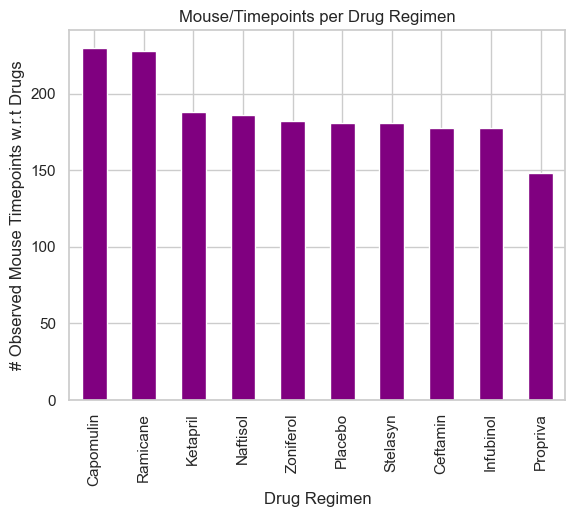

In [1570]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Set the figure size (optional)

cleaned_df.groupby("Drug Regimen")["Drug Regimen"].size().sort_values(ascending = False).plot(kind="bar",title = "Mouse/Timepoints per Drug Regimen", ylabel = "# Observed Mouse Timepoints w.r.t Drugs",color='purple')

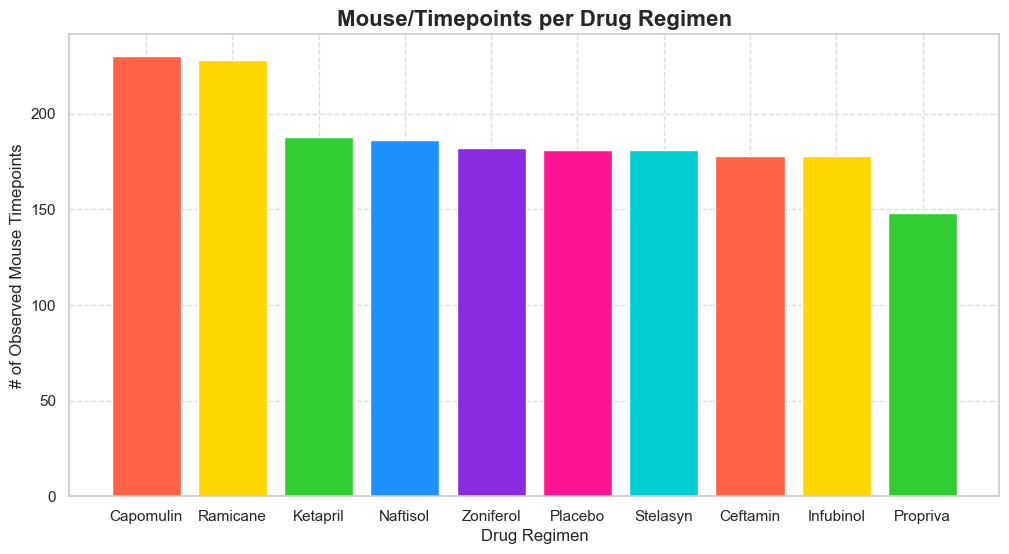

In [1571]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = cleaned_df.groupby("Drug Regimen")["Drug Regimen"].size().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
colors = ['#FF6347', '#FFD700', '#32CD32', '#1E90FF', '#8A2BE2', '#FF1493', '#00CED1']

# Create the bar chart
plt.bar(data.index, data.values,color=colors)

# Add titles and labels
plt.title("Mouse/Timepoints per Drug Regimen", fontweight="bold", fontsize=16, fontfamily="Arial")
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show the plot
plt.show()

In [1573]:
male_female_mice_count=cleaned_df.groupby('Sex')['Mouse ID'].nunique()
male_female_mice_count

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

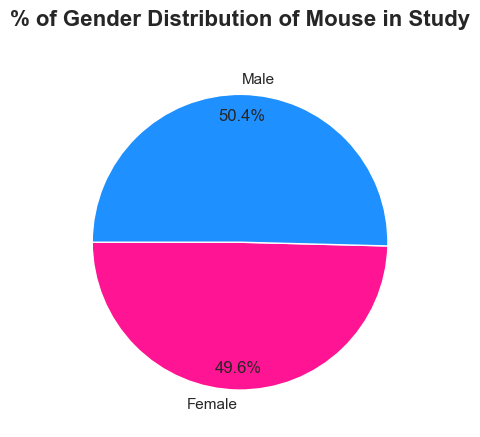

In [1576]:
# Make the pie chart 
# Count the number of occurrences of each gender (Male/Female)
male_female_mice_count=cleaned_df.groupby('Sex')['Mouse ID'].nunique()

# Create a pie chart
male_female_mice_count.plot(kind='pie', autopct='%1.1f%%', startangle=180, colors=['#FF1493','#1E90FF'],pctdistance=0.85)

# Set a title
plt.title(f"% of Gender Distribution of Mouse in Study\n", fontweight="bold", fontsize=16, fontfamily="Arial")

# Display the pie chart
plt.ylabel('')
plt.show()

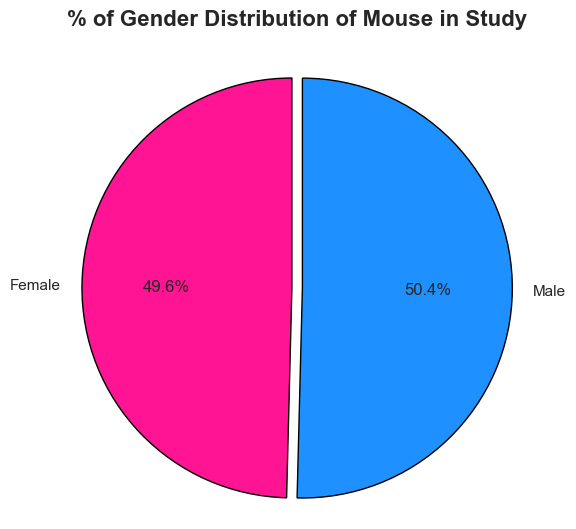

In [1578]:
# Create a pie chart using matplotlib

plt.figure(figsize=(6, 6))

labels = male_female_mice_count.index  

sizes = male_female_mice_count.values 

colors = ['#FF1493','#1E90FF']  

explode = (0.05, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Set a title
plt.title(f"% of Gender Distribution of Mouse in Study\n", fontweight="bold", fontsize=16, fontfamily="Arial")


# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

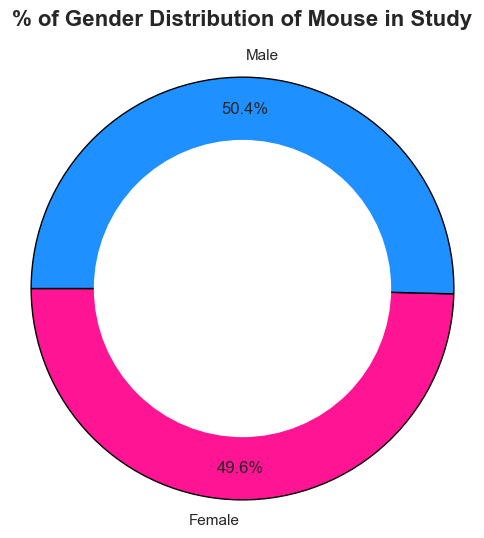

In [1580]:
# Donut Chart

plt.figure(figsize=(6, 6))
labels = male_female_mice_count.index  
sizes = male_female_mice_count.values  
colors = ['#FF1493','#1E90FF']  

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180, pctdistance=0.85, wedgeprops={'edgecolor': 'black','width': 0.4})


centre_circle = plt.Circle((0,0), 0.70, fc='white')  # Adjust 0.70 for hole size
plt.gca().add_artist(centre_circle)

# Add Labels/Title
plt.title(f"% of Gender Distribution of Mouse in Study\n", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.axis("equal")

# Show/Save the Graph
plt.show()

## Quartiles, Outliers and Boxplots

In [1583]:
#last (greatest) timepoint for each mouse
max_time = cleaned_df.groupby("Mouse ID")["Timepoint"].max()
max_time.head()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
Name: Timepoint, dtype: int64

In [1585]:
#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

filtered_df = pd.merge(max_time, cleaned_df, on=["Mouse ID", "Timepoint"], how="left")
filtered_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [1587]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

selected_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

mask = filtered_df["Drug Regimen"].isin(selected_drugs)
final_df = filtered_df.loc[mask].reset_index(drop=True)
final_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
5,a520,45,Ramicane,Male,13,21,38.810366,1
6,a577,30,Infubinol,Female,6,25,57.031862,2
7,a644,45,Ramicane,Female,7,17,32.978522,1
8,a685,45,Infubinol,Male,8,30,66.083066,3
9,b128,45,Capomulin,Female,9,22,38.982878,2


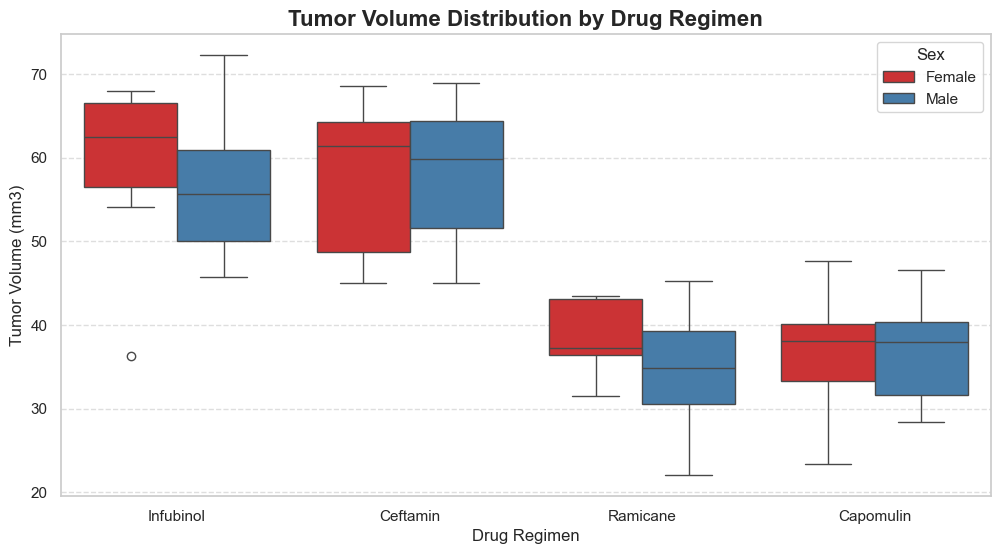

In [1589]:
# Generate a box plot that shows the distribution of the tumor volume by drug regimen.

plt.figure(figsize=(12, 6))
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=final_df, palette='Set1', hue='Sex')

# Add title and labels
plt.title('Tumor Volume Distribution by Drug Regimen', fontweight="bold", fontsize=16, fontfamily="Arial")
plt.xlabel('Drug Regimen', fontfamily="Arial", fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontfamily="Arial", fontsize=12)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Display the plot
plt.show()


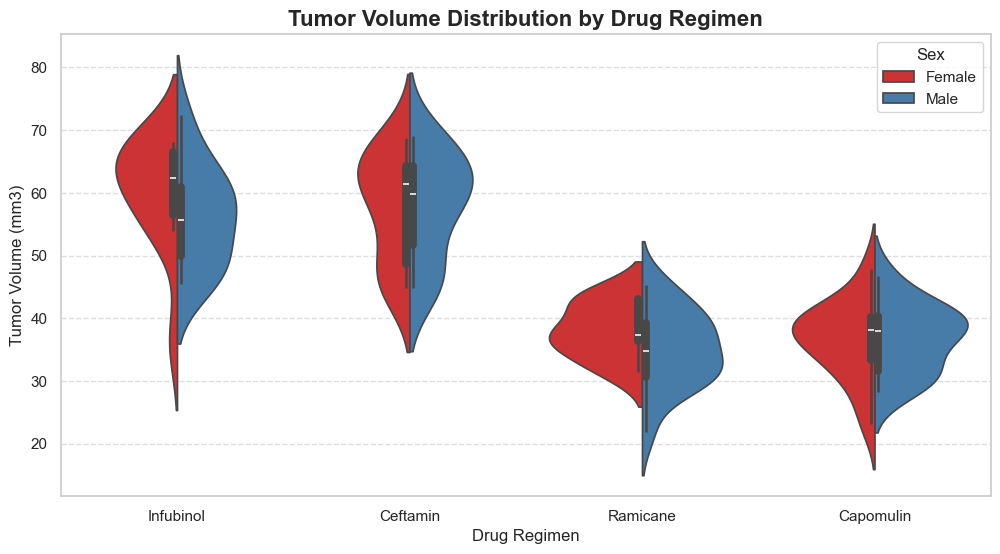

In [1591]:
# Generate a violin plot that shows the distribution of the tumor volume for each treatment group.

plt.figure(figsize=(12, 6))
sns.violinplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=final_df, palette='Set1', hue='Sex', split =True)

# Add title and labels
plt.title('Tumor Volume Distribution by Drug Regimen', fontweight="bold", fontsize=16, fontfamily="Arial")
plt.xlabel('Drug Regimen', fontfamily="Arial", fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontfamily="Arial", fontsize=12)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Display the plot
plt.show()

In [1593]:
# Thanks Learning Expert

# Put treatments into a list for for loop (and later for plot labels)
treatments = final_df["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data 
tumor_volumes = []

# Iterate through each treatment
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    treatment_data = final_df.loc[final_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset
    tumor_volumes.append(treatment_data)
    
    # Determine outliers using upper and lower bounds
    # Calculate IQR for outlier detection
    q1 = np.percentile(treatment_data, 25)
    q3 = np.percentile(treatment_data, 75)
    iqr = q3 - q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Identify outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"Outliers for {treatment}: {outliers.tolist()}")

Outliers for Infubinol: [36.3213458]
Outliers for Ceftamin: []
Outliers for Ramicane: []
Outliers for Capomulin: []


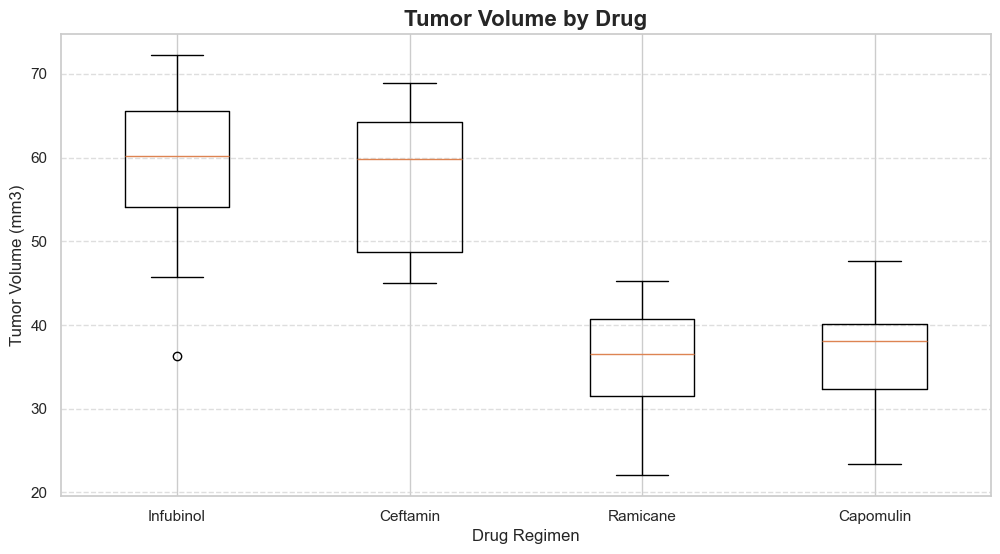

In [1595]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Change Canvas Size
plt.figure(figsize=(12, 6))

plt.boxplot(tumor_volumes, labels=treatments)

# Add Labels/Title
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Tumor Volume by Drug", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)
# plt.xlim(0,20)

# Show/Save the Graph
plt.show()

## Line and Scatter Plots

In [1604]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
226,j246,Capomulin,Female,21,21,0,45.000000,0
227,r554,Capomulin,Female,8,17,0,45.000000,0
228,s185,Capomulin,Female,3,17,0,45.000000,0
229,b742,Capomulin,Male,7,21,0,45.000000,0
230,x401,Capomulin,Female,16,15,0,45.000000,0
231,l509,Capomulin,Male,17,21,0,45.000000,0
232,s710,Capomulin,Female,1,23,0,45.000000,0
233,r157,Capomulin,Male,22,25,0,45.000000,0
234,u364,Capomulin,Male,18,17,0,45.000000,0


In [1606]:
# Select a specific mouse (e.g., 'a203')
single_mouse_data = capomulin_df[capomulin_df['Mouse ID'] == 'l509']
single_mouse_data 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
231,l509,Capomulin,Male,17,21,0,45.000000,0
253,l509,Capomulin,Male,17,21,5,45.851193,0
539,l509,Capomulin,Male,17,21,10,46.759074,0
881,l509,Capomulin,Male,17,21,15,47.488599,1
982,l509,Capomulin,Male,17,21,20,48.070452,2
1146,l509,Capomulin,Male,17,21,25,44.006257,2
1414,l509,Capomulin,Male,17,21,30,44.708055,2
1499,l509,Capomulin,Male,17,21,35,40.207288,2
1723,l509,Capomulin,Male,17,21,40,40.770813,2
1771,l509,Capomulin,Male,17,21,45,41.483008,3


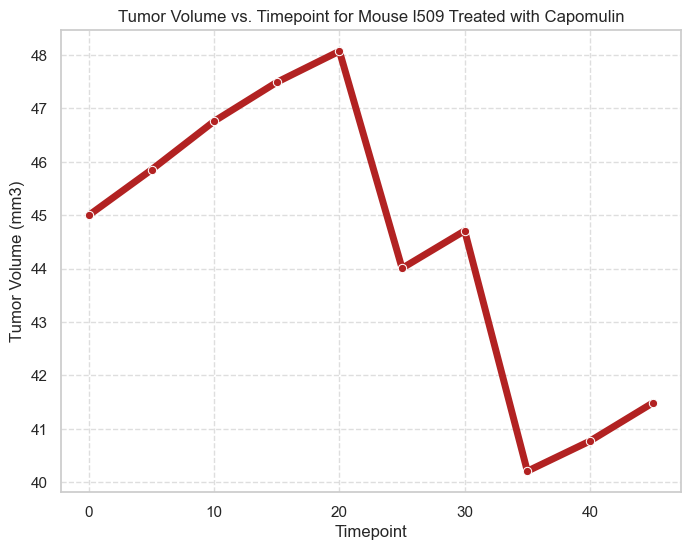

In [1608]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Create a line plot using seaborn or matplotlib
plt.figure(figsize=(8, 6))
sns.lineplot(x='Timepoint', y='Tumor Volume (mm3)', data=single_mouse_data, marker='o', color='firebrick', linewidth = 5)

# Add titles and labels
plt.title('Tumor Volume vs. Timepoint for Mouse l509 Treated with Capomulin', fontsize=12)
plt.xlabel('Timepoint', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
# Display the plot
plt.show()

In [1515]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
regimen = "Capomulin"
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] ==regimen]

avg_tumor_volume_df= capomulin_df.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"}).reset_index()
avg_tumor_volume_df

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0
5,i557,44.805810,24.0
6,i738,39.141053,20.0
7,j119,44.465236,23.0
8,j246,43.216925,21.0
9,l509,44.434474,21.0


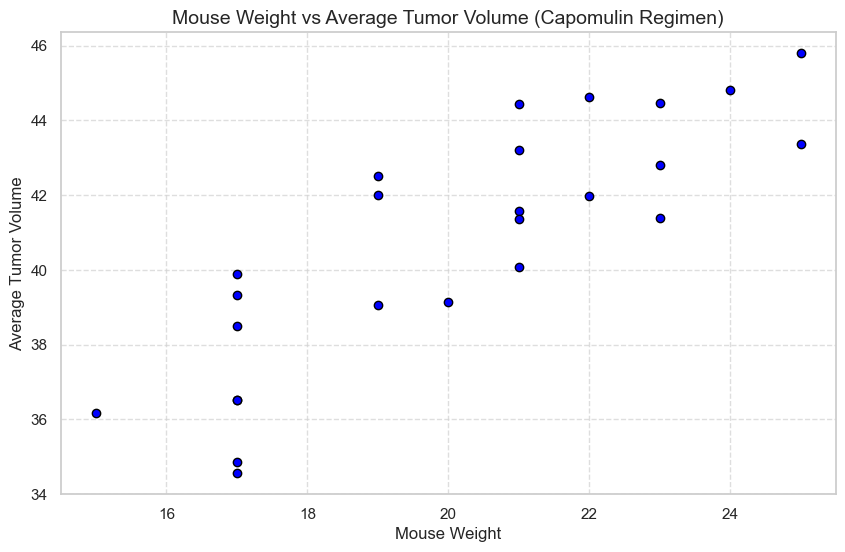

In [1517]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume_df['Weight (g)'], avg_tumor_volume_df['Tumor Volume (mm3)'], color='blue', edgecolor='black')

# Step 6: Customize the plot
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin Regimen)', fontsize=14)
plt.xlabel('Mouse Weight', fontsize=12)
plt.ylabel('Average Tumor Volume', fontsize=12)
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
# Show the plot
plt.show()

## Correlation and Regression

In [1520]:
# Calculate the correlation coefficient for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = avg_tumor_volume_df['Weight (g)'].corr(avg_tumor_volume_df['Tumor Volume (mm3)'])
correlation 

0.8419363424694722

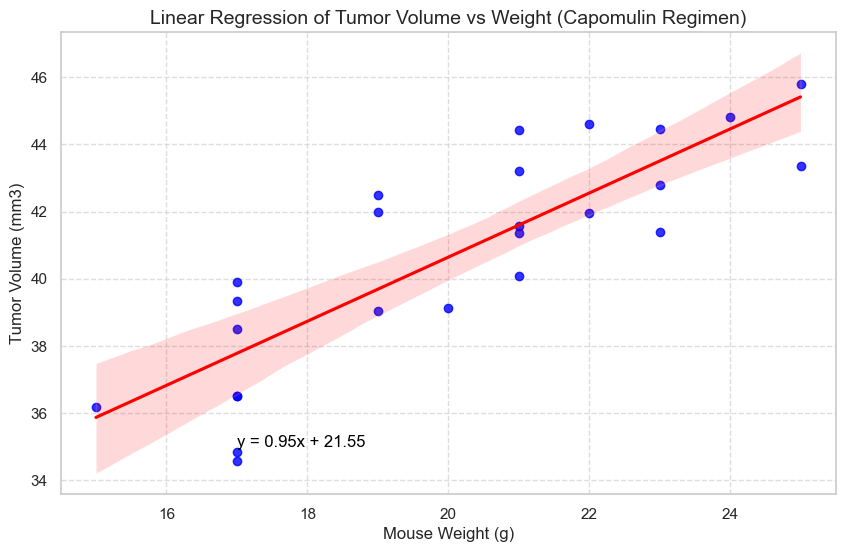

In [1522]:
# Create a linear regression plot for Tumor Volume vs Weight

plt.figure(figsize=(10,6))

# Using Seaborn's regplot to plot the scatter plot with a regression line
sns.regplot(x='Weight (g)', y='Tumor Volume (mm3)', data=avg_tumor_volume_df, 
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add titles and labels
plt.title('Linear Regression of Tumor Volume vs Weight (Capomulin Regimen)', fontsize=14)
plt.xlabel('Mouse Weight (g)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.text(17, 35, equation_text, fontsize=12, color='black')

# Display the plot
plt.show()
